In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from matplotlib.image import imsave
import os

In [4]:
original_image = "/mnt/DATA/dronetracking/Abhin/segement&detect/sam-hq/video1/00001.jpg"

original_image = cv2.imread(original_image)

In [6]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="/mnt/DATA/dronetracking/Abhin/segment-anything/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(original_image)

In [9]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

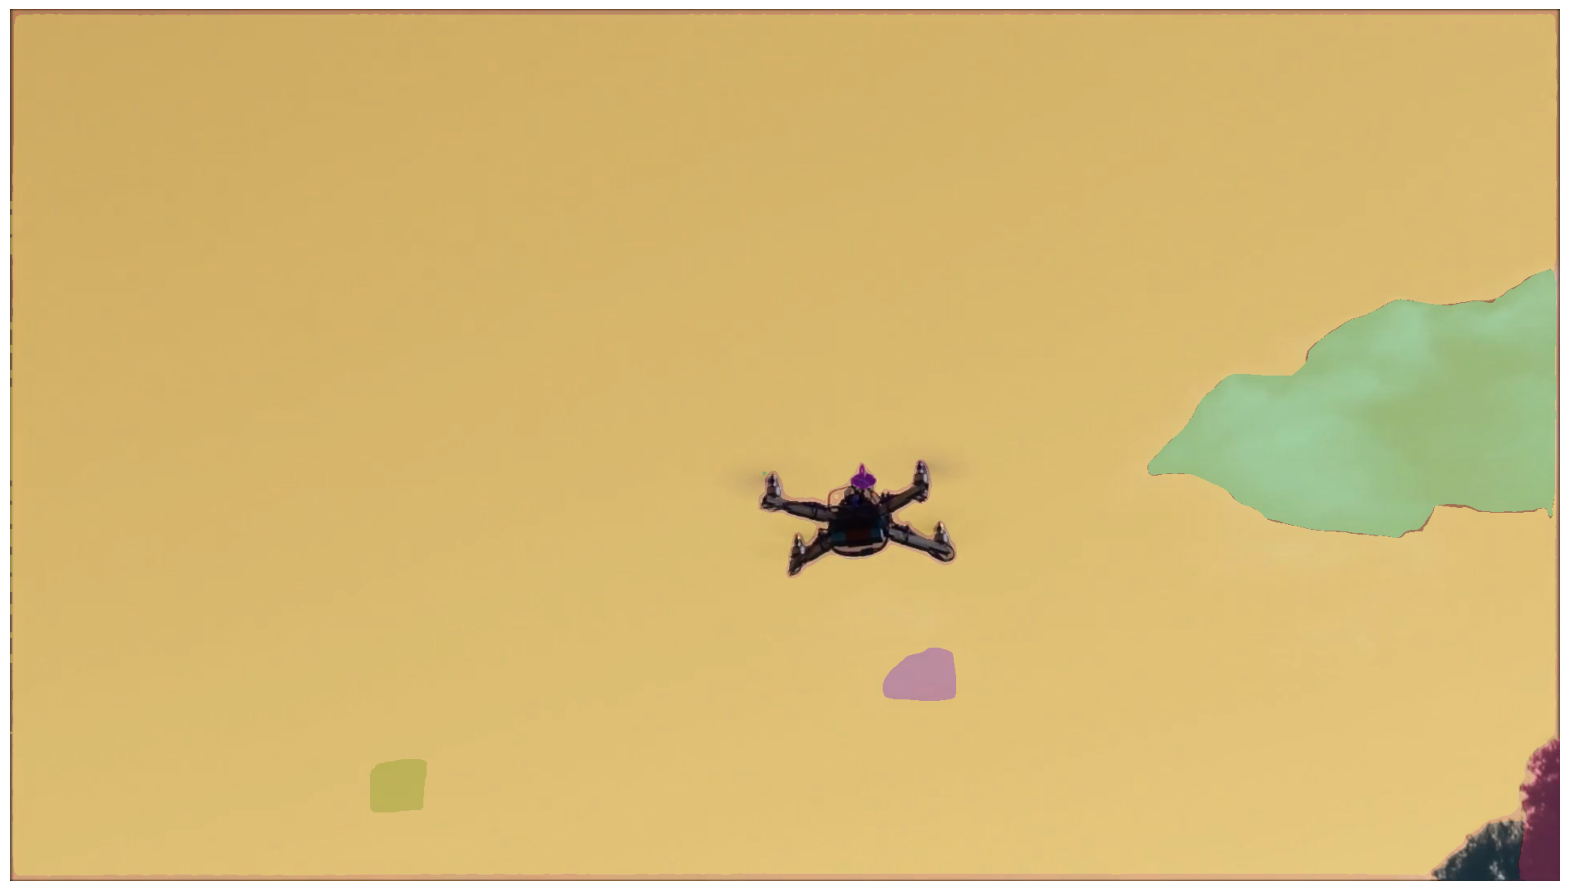

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(original_image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [11]:
from segment_anything import SamPredictor, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="/mnt/DATA/dronetracking/Abhin/segment-anything/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)
predictor.set_image(original_image)

In [23]:
input_point = np.array([[1050, 630]])
input_label = np.array([1])

In [13]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    


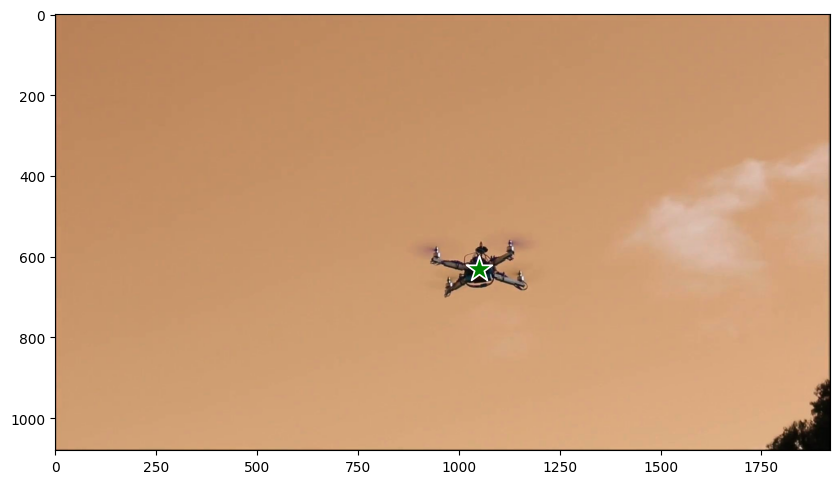

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(original_image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [25]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

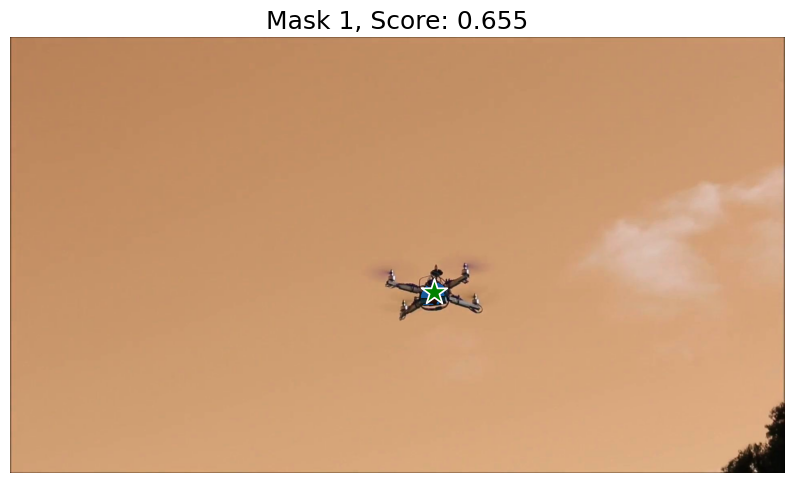

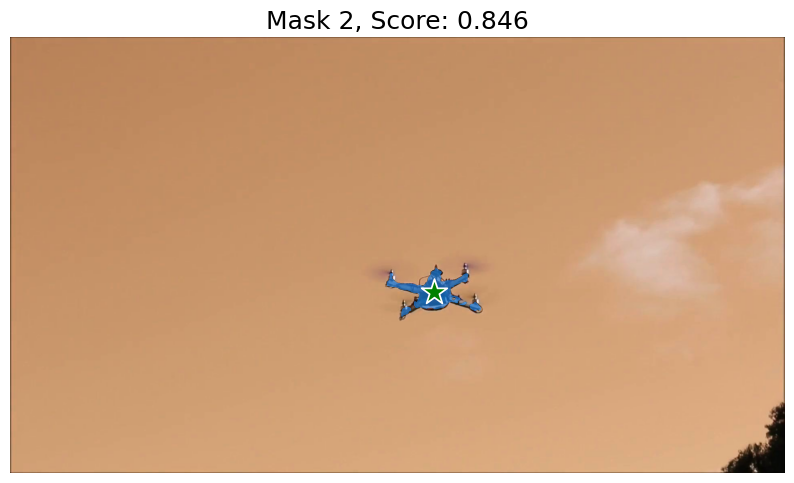

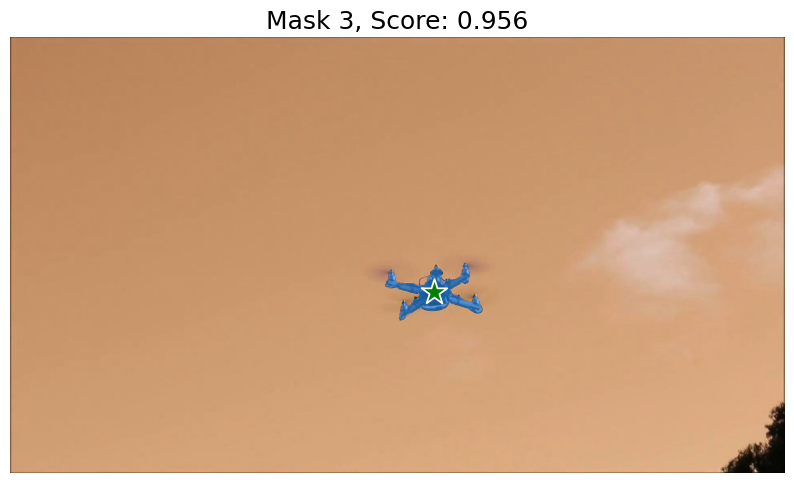

In [27]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(original_image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  
  

In [29]:
import numpy as np
import cv2

# Find the index of the mask with the highest score
max_score_idx = np.argmax(scores)

# Get the corresponding mask
best_mask = masks[max_score_idx]

# Convert the mask to a format suitable for saving
# Assuming the mask is binary, multiply by 255 to get a proper image format
best_mask_image = (best_mask * 255).astype(np.uint8)

# Save the image using OpenCV
cv2.imwrite(f"/mnt/DATA/dronetracking/Abhin/segement&detect/sam/best_mask_{max_score_idx+1}.png", best_mask_image)




True